# Logistic Regression

## **Description**

A logistic regression is a feed forward neural network that has no hidden layer in the process. This type of regression basically maps the input layer to the output layer. Compared to a linear regression, this type of regression is a lot more similar to a neuron. The primary difference between linear regression and logistic regression is that logistic regression's range is bounded between 0 and 1. In addition, as opposed to linear regression, logistic regression does not require a linear relationship between inputs and output variables. This is due to applying a nonlinear log transformation to the odds ratio (will be defined shortly).

![logisticregression](logisticexample.jpg)

## Packages used
- matplotlib.pyplot
- numpy
- pandas
- seaborn
- mlxtend

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

In [2]:
df2 = pd.read_csv("winequality-red.csv")
df2 = df2.rename(columns = {'volatile acidity': 'volatileacidity', 
                'citric acid':'citricacid', 'fixed acidity':'fixedacidity',
                'residual sugar':'residualsugar', 'free sulfur dioxide':'freesulfurdioxide',
                'total sulfur dioxide':'totalsulfurdioxide'})

df3 = df2.iloc[:1600][["volatileacidity", "citricacid",'quality']]

In [3]:
df2.head()

,fixedacidity,volatileacidity,citricacid,residualsugar,chlorides,freesulfurdioxide,totalsulfurdioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df2.dtypes
df2.info()
df2.isnull().sum()
df3.dtypes
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   fixedacidity        1599 non-null   float64
 1   volatileacidity     1599 non-null   float64
 2   citricacid          1599 non-null   float64
 3   residualsugar       1599 non-null   float64
 4   chlorides           1599 non-null   float64
 5   freesulfurdioxide   1599 non-null   float64
 6   totalsulfurdioxide  1599 non-null   float64
 7   density             1599 non-null   float64
 8   pH                  1599 non-null   float64
 9   sulphates           1599 non-null   float64
 10  alcohol             1599 non-null   float64
 11  quality             1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
--

,volatileacidity,citricacid,quality
0,0.70,0.00,5
1,0.88,0.00,5
2,0.76,0.04,5
3,0.28,0.56,6
4,0.70,0.00,5


# Plot data and show values in different colors

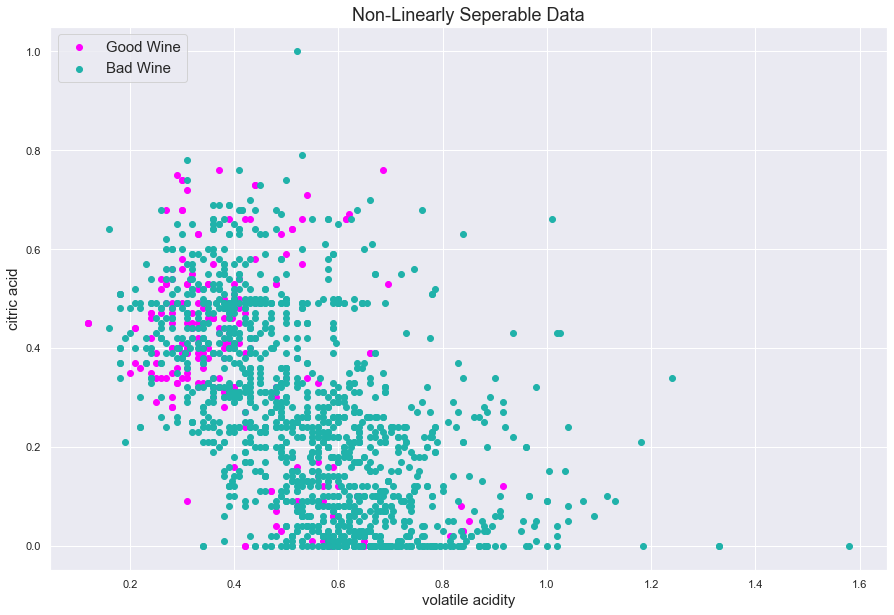

In [5]:
sns.set_theme()

# Read the iris dataset into a pandas DataFrame object with seaborn


Good = df3[df3.quality >= 7 ]
Bad = df3[df3.quality <=6]

fig, ax2 = plt.subplots(1, 1, figsize=(15,10))


ax2.scatter(Good.volatileacidity, 
            Good.citricacid, 
            color = "magenta", 
            label = "Good Wine")
ax2.scatter(Bad.volatileacidity, 
            Bad.citricacid, 
            color = "lightseagreen", 
            label = "Bad Wine")
ax2.set_xlabel("volatile acidity", fontsize = 15)
ax2.set_ylabel("citric acid", fontsize = 15)
ax2.legend(fontsize = 15, loc = "upper left")
ax2.set_title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

In [6]:
print(Good.info())
print(Bad.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217 entries, 7 to 1584
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   volatileacidity  217 non-null    float64
 1   citricacid       217 non-null    float64
 2   quality          217 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 6.8 KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1382 entries, 0 to 1598
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   volatileacidity  1382 non-null   float64
 1   citricacid       1382 non-null   float64
 2   quality          1382 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 43.2 KB
None


# Test a point from the non linearly sperable data with least amount of overlap

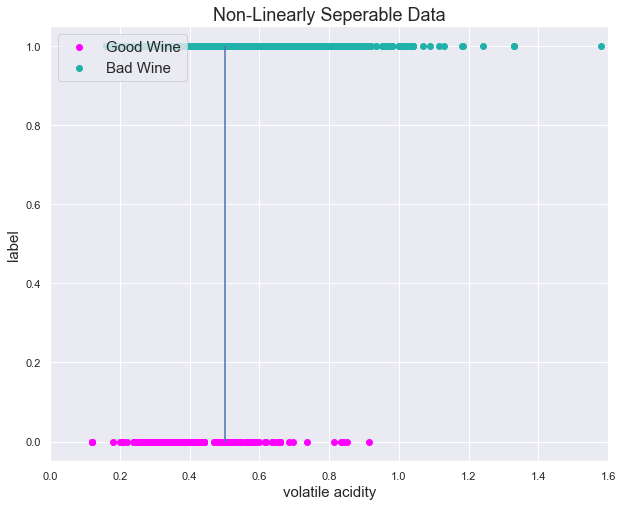

In [7]:
plt.figure(figsize = (10, 8))
plt.xlim((0, 1.6 ))
plt.scatter(Good.volatileacidity, 
            np.zeros(217), 
            color = "magenta", 
            label = "Good Wine")
plt.scatter(Bad.volatileacidity, 
            np.ones(1382), 
            color = "lightseagreen", 
            label = "Bad Wine")
plt.vlines(0.5, 0.0, 1.0)
plt.xlabel("volatile acidity", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("Non-Linearly Seperable Data", fontsize = 18)
plt.show()

## show this seperation with sigmoid function

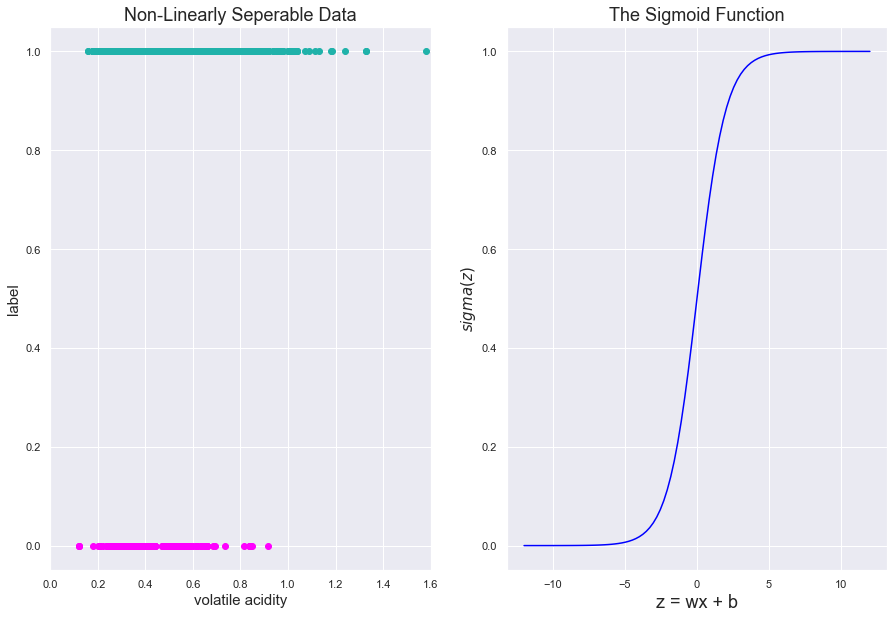

In [8]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.set_xlim((0, 1.6))
ax1.scatter(Good.volatileacidity, 
            np.zeros(217), 
            color = "magenta", 
            label = "Good Wine")
ax1.scatter(Bad.volatileacidity, 
            np.ones(1382), 
            color = "lightseagreen", 
            label = "Bad Wine")
ax1.set_xlabel("volatile acidity", fontsize = 15)
ax1.set_ylabel("label", fontsize = 15)
ax1.set_title("Non-Linearly Seperable Data", fontsize = 18)


domain = np.linspace(-12.0, 12.0, 100)
ax2.plot(domain, 
        sigmoid(domain), 
        color = "blue", 
        label = "$\sigma$(z)")
ax2.set_xlabel("z = wx + b", fontsize = 18)
ax2.set_ylabel("$sigma(z)$", fontsize = 15)
ax2.set_title("The Sigmoid Function", fontsize = 18)
plt.show()

In [9]:
class SingleNeuron(object):
    """
    A class used to represent a single artificial neuron. 

    ...

    Attributes
    ----------
    activation_function : function
        The activation function applied to the preactivation linear combination.
    
    cost_function : function
        The cost function used to measure model performance.

    w_ : numpy.ndarray
        The weights and bias of the single neuron. The last entry being the bias. 
        This attribute is created when the train method is called.

    errors_: list
        A list containing the mean sqaured error computed after each iteration 
        of stochastic gradient descent per epoch. 

    Methods
    -------
    train(self, X, y, alpha = 0.005, epochs = 50)
        Iterates the stochastic gradient descent algorithm through each sample 
        a total of epochs number of times with learning rate alpha. The data 
        used consists of feature vectors X and associated labels y. 

    predict(self, X)
        Uses the weights and bias, the feature vectors in X, and the 
        activation_function to make a y_hat prediction on each feature vector. 
    """
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
   
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X, y):
                self.w_[:-1] -= alpha*(self.predict(xi) - target)*xi
                self.w_[-1] -= alpha*(self.predict(xi) - target)
                #errors += .5*((self.predict(xi) - target)**2)
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self

    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)


    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10, 8))
        axs.plot(range(1, len(self.errors_) + 1), 
                self.errors_,
                label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()

    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize = (10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Logistic Regression Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

In [12]:
def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1 - y)*np.log(1 - y_hat)

node = SingleNeuron(sigmoid, cross_entropy_loss)

X = df3.iloc[:1600].volatileacidity.values
X = X.reshape(-1, 1)
y = np.where(df3.iloc[:1600].quality >=7, 0, 1)

node.train(X, y, alpha = 0.01, epochs = 10000)

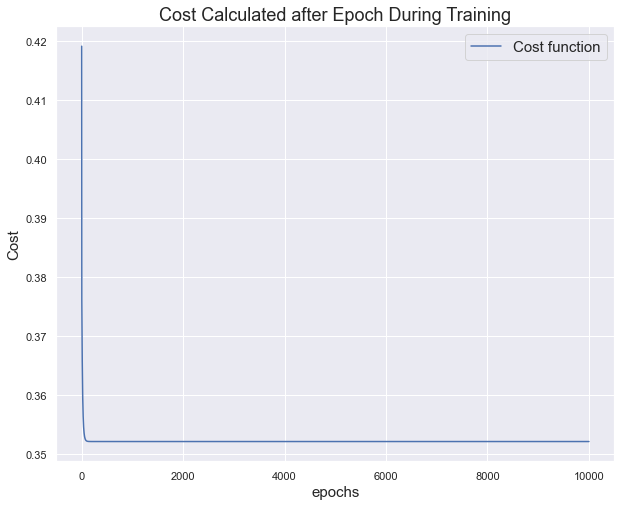

In [13]:
node.plot_cost_function()
plt.show()

## Test sigmoid function with data

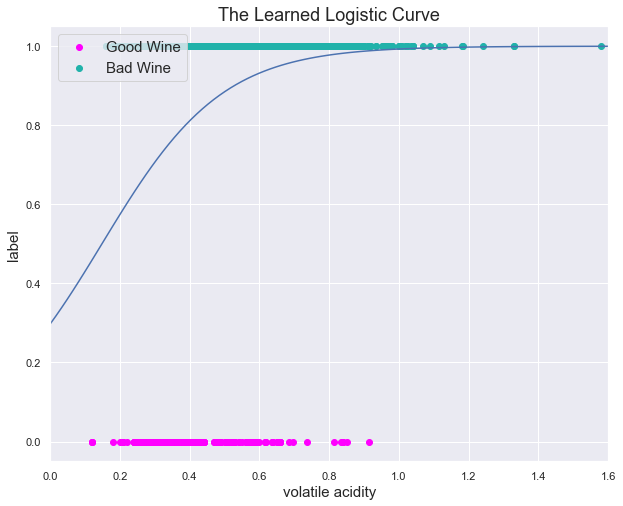

In [14]:
plt.figure(figsize = (10, 8))
plt.xlim((0, 1.6 ))
plt.scatter(Good.volatileacidity, 
            np.zeros(217), 
            color = "magenta", 
            label = "Good Wine")
plt.scatter(Bad.volatileacidity, 
            np.ones(1382), 
            color = "lightseagreen", 
            label = "Bad Wine")

domain = np.linspace(0, 1.6, 100)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.xlabel("volatile acidity", fontsize = 15)
plt.ylabel("label", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.title("The Learned Logistic Curve", fontsize = 18)
plt.show()

In [15]:
node.predict(X)

array([0.96071967, 0.98579755, 0.97193188, ..., 0.89050716, 0.94676024,
       0.71848446])

In [16]:
np.rint(node.predict(X)) != y

array([False, False, False, ..., False, False, False])

In [17]:
classification_error = (np.rint(node.predict(X)) != y).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y)}")

Classification Error = 0.133833646028768


## Look at descision boundary

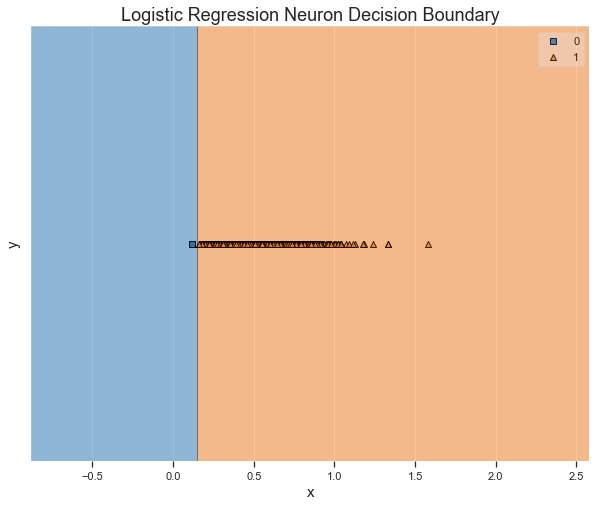

In [18]:
node.plot_decision_boundary(X, y)
plt.show()

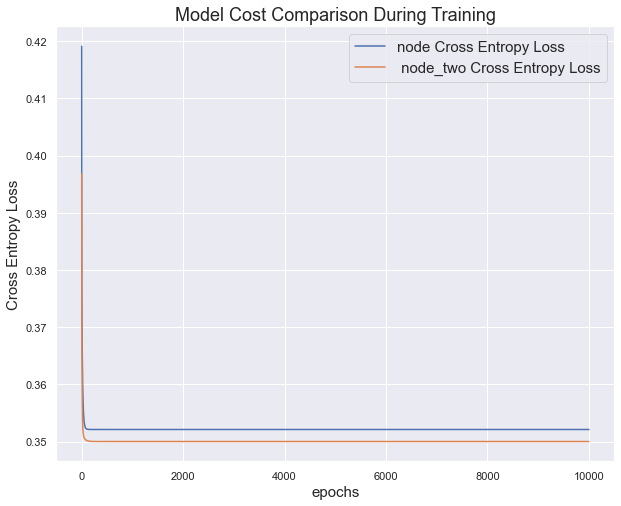

In [19]:
# Instantiate a new single neuron.
node_two = SingleNeuron(sigmoid, cross_entropy_loss)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_two = df3.iloc[:1600][["volatileacidity", "citricacid"]].values

# Train the new single neuron model on the new feature vectors.
node_two.train(X_two, y, alpha = 0.01, epochs = 10_000)


plt.figure(figsize = (10, 8))
plt.plot(range(1, len(node.errors_) + 1), 
         node.errors_,
         label = "node Cross Entropy Loss")
plt.plot(range(1, len(node_two.errors_) + 1), 
         node_two.errors_,
         label = " node_two Cross Entropy Loss")
plt.xlabel("epochs", fontsize = 15)
plt.ylabel("Cross Entropy Loss", fontsize = 15)
plt.legend(fontsize = 15)
plt.title("Model Cost Comparison During Training", fontsize = 18)


plt.show()

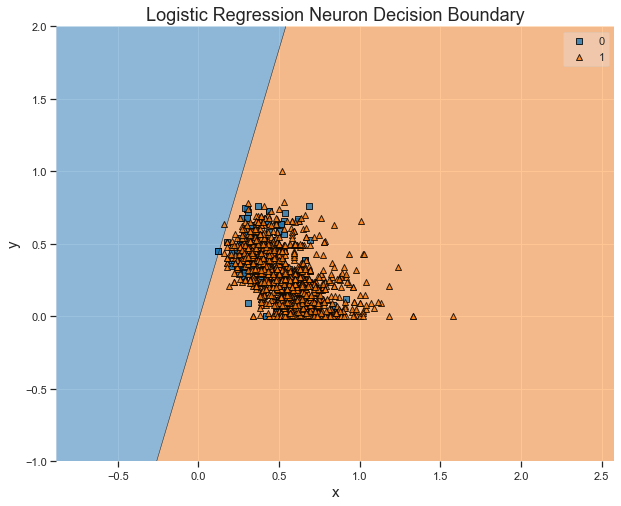

In [20]:
node_two.plot_decision_boundary(X_two, y)

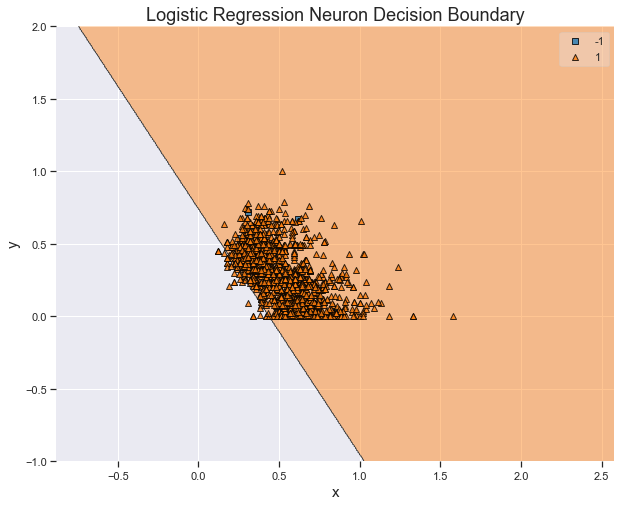

In [25]:
def sign(z):
    return np.sign(z)

def MSE(y_hat, y):
    return .5*(y_hat - y)**2

# Instantiate a new single neuron.
node_three = SingleNeuron(sign, MSE)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_three = df3.iloc[:1600][["volatileacidity", "citricacid"]].values

y_three = np.where(df3.iloc[:1600].quality > 7, -1, 1)


# Train the new single neuron model on the new feature vectors.
node_three.train(X_three, y_three, alpha = 0.001, epochs = 5_000)

node_three.plot_decision_boundary(X_three, y_three)
plt.show()

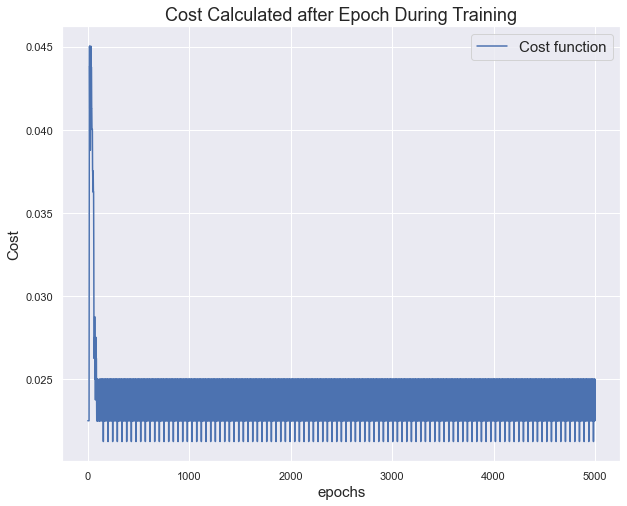

In [26]:
node_three.plot_cost_function()


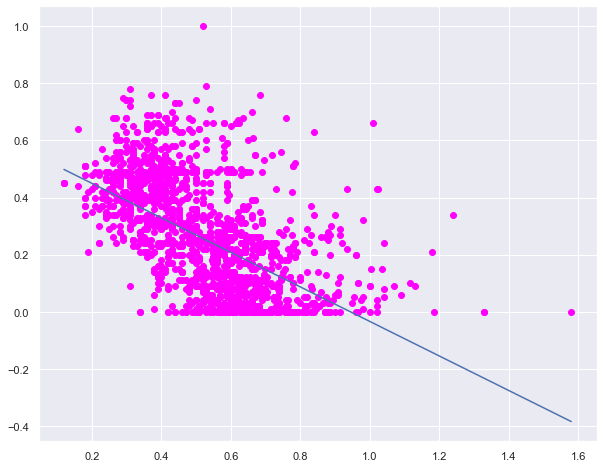

In [28]:
def linear(z):
    return z

# Instantiate a new single neuron.
node_four = SingleNeuron(linear, MSE)

# Create a numpy.ndarray of petal length and sepal length values for
# the versicolor and virginica flowers, respectively. 
X_four = df3.iloc[:1600]["volatileacidity"].values
X_four = X_four.reshape(-1, 1)

y_four = df2.iloc[:1600]["citricacid"].values


# Train the new single neuron model on the new feature vectors.
node_four.train(X_four, y_four, alpha = 0.001, epochs = 5_000)

plt.figure(figsize = (10, 8))
plt.scatter(X_four, y_four, color = "magenta")

domain = np.linspace(np.min(X_four), np.max(X_four), 50)
plt.plot(domain, node_four.predict(domain.reshape(-1, 1)))
plt.show()